In [3]:
%pip install opencv-python
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.4/910.4 kB 14.9 MB/s eta 0:00:00


In [26]:
def blur_object(image, factor=6.0):
    (h, w) = image.shape[:2]
    kW = int(w/factor)
    kH = int(h/factor)
    if kW % 2 == 0:
        kW -= 1
    if kH % 2 == 0:
        kH -= 1
    return cv2.GaussianBlur(image, (kW, kH), 0)


0: 352x640 5 persons, 369.1ms
Speed: 4.1ms preprocess, 369.1ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


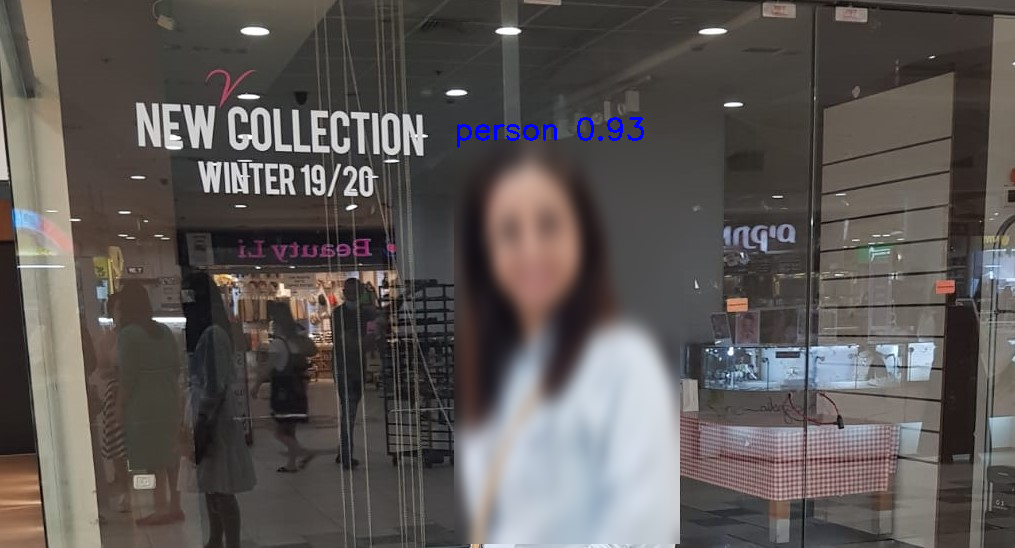

In [27]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the model
yolo = YOLO('yolov8s.pt')

# Load the video capture
videoCap = cv2.VideoCapture(0)

# Function to get class colors
def getColours(cls_num):
    base_colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    color_index = cls_num % len(base_colors)
    increments = [(1, -2, 1), (-2, 1, -1), (1, -1, 2)]
    color = [base_colors[color_index][i] + increments[color_index][i] *
    (cls_num // len(base_colors)) % 256 for i in range(3)]
    return tuple(color)

t=0
while t==0:
    frame = cv2.imread('/content/22.13.59.jpeg')
    #ret, frame = videoCap.read()
    #if not ret:
    #    continue
    results = yolo.track(frame, stream=True)


    for result in results:
        # get the classes names
        classes_names = result.names

        # iterate over each box
        for box in result.boxes:
            # check if confidence is greater than 40 percent
            if box.conf[0] > 0.4:
                # get coordinates
                [x1, y1, x2, y2] = box.xyxy[0]
                # convert to int
                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                # get the class
                cls = int(box.cls[0])

                # get the class name
                class_name = classes_names[cls]

                # get the respective colour
                colour = getColours(cls)
                if box.conf[0] > 0.8 and class_name=='person':
                  # draw the border rectangle
                  #cv2.rectangle(frame, (x1, y1), (x2, y2), colour,2)
                  # draw the fill rectangle
                  #cv2.rectangle(frame, (x1, y1), (x2, y2), colour,-1)
                  #blur object
                  frame[y1:y2,x1:x2]= blur_object(frame[y1:y2,x1:x2])
                # put the class name and confidence on the image
                  cv2.putText(frame, f'{classes_names[int(box.cls[0])]} {box.conf[0]:.2f}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, colour, 2)

    # show the image
    #cv2.imshow('frame', frame)
    cv2_imshow(frame)
    t=1
    # break the loop if 'q' is pressed
    #if cv2.waitKey(1) & 0xFF == ord('q'):
    #    break

# release the video capture and destroy all windows
videoCap.release()
cv2.destroyAllWindows()